In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.decomposition import PCA
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

In [29]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
#y값은 one hot 인코딩 방식으로 초기화 함...(a,b,c)중 하나를 hot하게 함...
y_data = [[0, 0, 1],#2
          [0, 0, 1],#2
          [0, 0, 1],#2
          [0, 1, 0],#1
          [0, 1, 0],#1
          [0, 1, 0],#1
          [1, 0, 0],#0
          [1, 0, 0]]#0


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
#칼로리, 식습관 운동습관과 그에 따른 체형 데이터를
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
Y = df[['body_shape']]

df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [14]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


C:\Users\Kyujin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kyujin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
features=x_std.T
cov_matrix=np.cov(features)
print(cov_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [26]:
eig_vals, eig_vecs =np.linalg.eig(cov_matrix)
print('고유벡터: %s' %eig_vecs)
print('고유값: %s' %eig_vals)
# 고유 벡터는해당 행렬이 벡터에 작용하는 힘의 방향
# 공분산행렬의 고유벡터는? 데이터가 어느 방향으로 분산되어 있는지를 나타내는 것
# 고유값? 고유벡터에 해당하는 상관계수
# 공분산행렬의 고유값? 각 축에 대한 공분산 값
# 결국, 고유값이 큰 순서대로 고유벡터를 나열하면 중요한 주성분부터 추출됨

고유벡터: [[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]
고유값: [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [27]:
eig_vals[0]/sum(eig_vals)
# 73%의 정보를 표현 가능

0.7318321731427544

In [28]:
projected_X=x_std.dot(eig_vecs.T[0])
projected_X
# 1차원으로 차원 축소된 데이터

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [31]:
res=pd.DataFrame(projected_X, columns=["PC1"])
res['yaxis']=0.0
res['label']=Y
res

,PC1,yaxis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


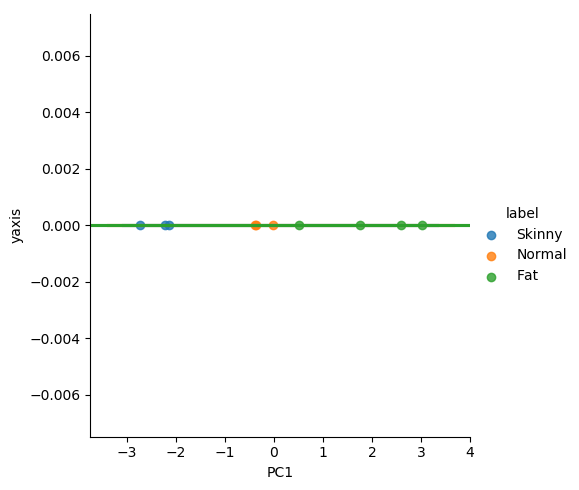

In [34]:
sns.lmplot('PC1', 'yaxis', data= res, hue='label')

In [39]:
df=pd.read_csv("HR_comma_sep.csv")
columns_names=df.columns
columns_names

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

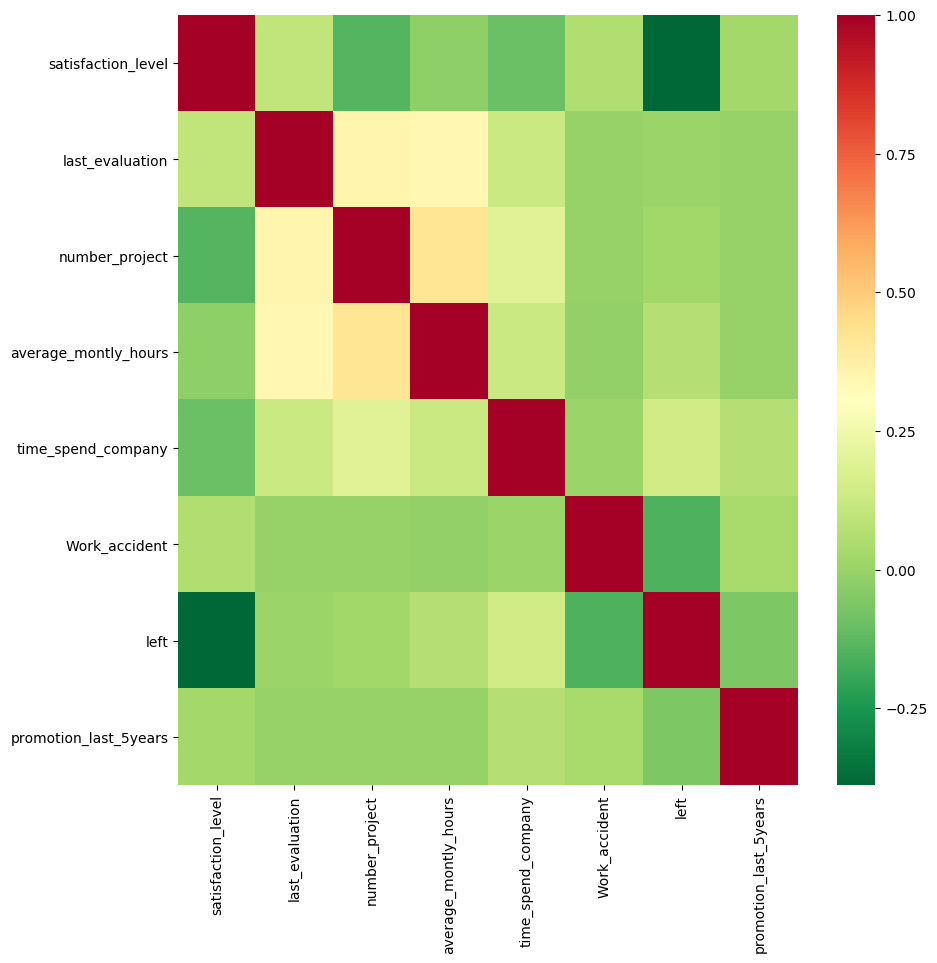

In [53]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap='RdYlGn_r')

In [49]:
sales=df.groupby('sales').sum()

In [67]:
groupby_sales=df.groupby('sales').mean()


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [78]:
IT=groupby_sales['satisfaction_level'].IT
RandD=groupby_sales['satisfaction_level'].RandD
accounting=groupby_sales['satisfaction_level'].accounting
hr=groupby_sales['satisfaction_level'].hr
management=groupby_sales['satisfaction_level'].management
marketing=groupby_sales['satisfaction_level'].marketing
product_mng=groupby_sales['satisfaction_level'].product_mng
sales=groupby_sales['satisfaction_level'].sales
support=groupby_sales['satisfaction_level'].support
technical=groupby_sales['satisfaction_level'].technical
technical
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [81]:
df_drop=df.drop(labels=['salary','sales'], axis=1)

cols=df_drop.columns.tolist()
cols.insert(0, cols.pop(cols.index('left')))
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [83]:
df_drop=df_drop.reindex(columns=cols)

In [84]:
X_std=StandardScaler().fit_transform(df_drop)


C:\Users\Kyujin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kyujin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [85]:
mena_vec= np.mean(X_std,axis=0)

In [88]:
cov_mat=np.cov(X_std.T)

In [89]:
cov_mat

array([[ 1.00006668, -0.38840088,  0.00656756,  0.02378877,  0.07129193,
         0.14483183, -0.15463194, -0.06179223],
       [-0.38840088,  1.00006668,  0.10502822, -0.14297912, -0.02004945,
        -0.1008728 ,  0.05870115,  0.02560689],
       [ 0.00656756,  0.10502822,  1.00006668,  0.34935588,  0.33976445,
         0.1315995 , -0.00710476, -0.00868435],
       [ 0.02378877, -0.14297912,  0.34935588,  1.00006668,  0.41723845,
         0.19679901, -0.00474086, -0.00606436],
       [ 0.07129193, -0.02004945,  0.33976445,  0.41723845,  1.00006668,
         0.12776343, -0.01014356, -0.00354465],
       [ 0.14483183, -0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,
         1.00006668,  0.00212056,  0.06743742],
       [-0.15463194,  0.05870115, -0.00710476, -0.00474086, -0.01014356,
         0.00212056,  1.00006668,  0.03924805],
       [-0.06179223,  0.02560689, -0.00868435, -0.00606436, -0.00354465,
         0.06743742,  0.03924805,  1.00006668]])

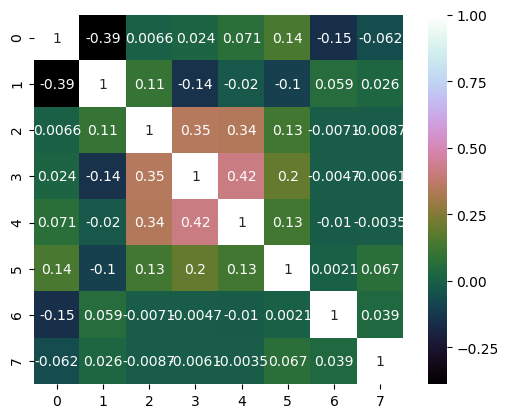

In [90]:
sns.heatmap(cov_mat, cmap='cubehelix', annot=True, square=True)

In [95]:
eig_vals, eig_vecs=np.linalg.eig(cov_mat)
print("아이겐 벡터:\n", "%s" %eig_vecs)
print('아이겐벨류:\n', '%s' %eig_vals)

아이겐 벡터:
 [[-0.2163394   0.61631274 -0.45356155 -0.16219105  0.58392171 -0.01069646
   0.01364792 -0.00816191]
 [ 0.18956186 -0.60825815 -0.51043559 -0.2910217   0.2433296  -0.14578963
  -0.32268329  0.2534991 ]
 [-0.46363715 -0.31222881  0.27367838  0.54777287  0.52257837 -0.15715943
  -0.06471173  0.10307248]
 [-0.55704703 -0.12254292 -0.58883958  0.24157676 -0.47335058 -0.0129521
   0.1887942  -0.09858338]
 [-0.52559587 -0.17853674  0.30588994 -0.72147388  0.02274205 -0.11339814
   0.25349244 -0.0120681 ]
 [-0.33395132  0.11709262  0.11038416 -0.09314767 -0.16013636  0.44415687
  -0.79303045  0.04569912]
 [ 0.06443923 -0.28140442 -0.07016424 -0.02938544  0.25312908  0.42577604
   0.06549289 -0.81315664]
 [ 0.00870881 -0.11358933 -0.03780465  0.02283486  0.11154387  0.74989628
   0.39801173  0.50186771]]
아이겐벨류:
 [1.86103997 1.46419116 0.47748369 0.62652988 0.70902817 1.06065738
 0.84555567 0.95604748]


In [97]:
eig_pairs=[(eig_vals[i], eig_vecs[:,i]) for i in range(len(eig_vals))]

In [105]:
eig_pairs.sort(key=lambda x:x[0], reverse=True)
eig_pairs
for i in eig_pairs:
    print(i[0])
    
tot=sum(eig_vals)

var_exp=[(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)

1.8610399673428666
1.464191157161325
1.0606573786654143
0.9560474847067929
0.8455556732844365
0.709028174179821
0.6265298821915981
0.4774836869216769
[23.261448621748368, 18.301169223869547, 13.257333293239446, 11.94979679948036, 10.568741239349269, 8.862261281042862, 7.831101384350276, 5.968148156919884]


In [108]:
pca=PCA().fit(X_std)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [109]:
pca.explained_variance_ratio_

array([0.23261449, 0.18301169, 0.13257333, 0.11949797, 0.10568741,
       0.08862261, 0.07831101, 0.05968148])

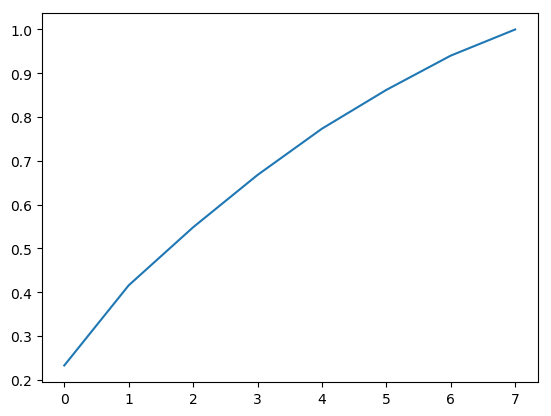

In [110]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [112]:
sk_pca=PCA(n_components=6)#6차원으로 축소
y_sk=sk_pca.fit_transform(X_std)
y_sk.shape

(14999, 6)